In [40]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import os
import glob
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams["font.family"] = "Arial"
matplotlib.rcParams["font.size"] = 18

In [ ]:
# make sure you have GPS4Drugs in same directory as the figure_code folder
data = np.load("../GPS4Drugs/data/profile_pred/MEDIAN/ENAMINE_HTS_strong.npz")
colnames = data['columns'].tolist()
rownames = data['index'].tolist()
library = pd.DataFrame(data=data['X'], index=rownames, columns=colnames)

sele_drugs = ['Z1516314927', 'Z3888289046', 'Z57065103', 'Z645919648']
num_drug = {'Z1516314927':'Drug 5', 'Z3888289046':'Drug 15', 'Z57065103':'Drug 17', 'Z645919648':'Drug 18'}
sigi = library[sele_drugs]

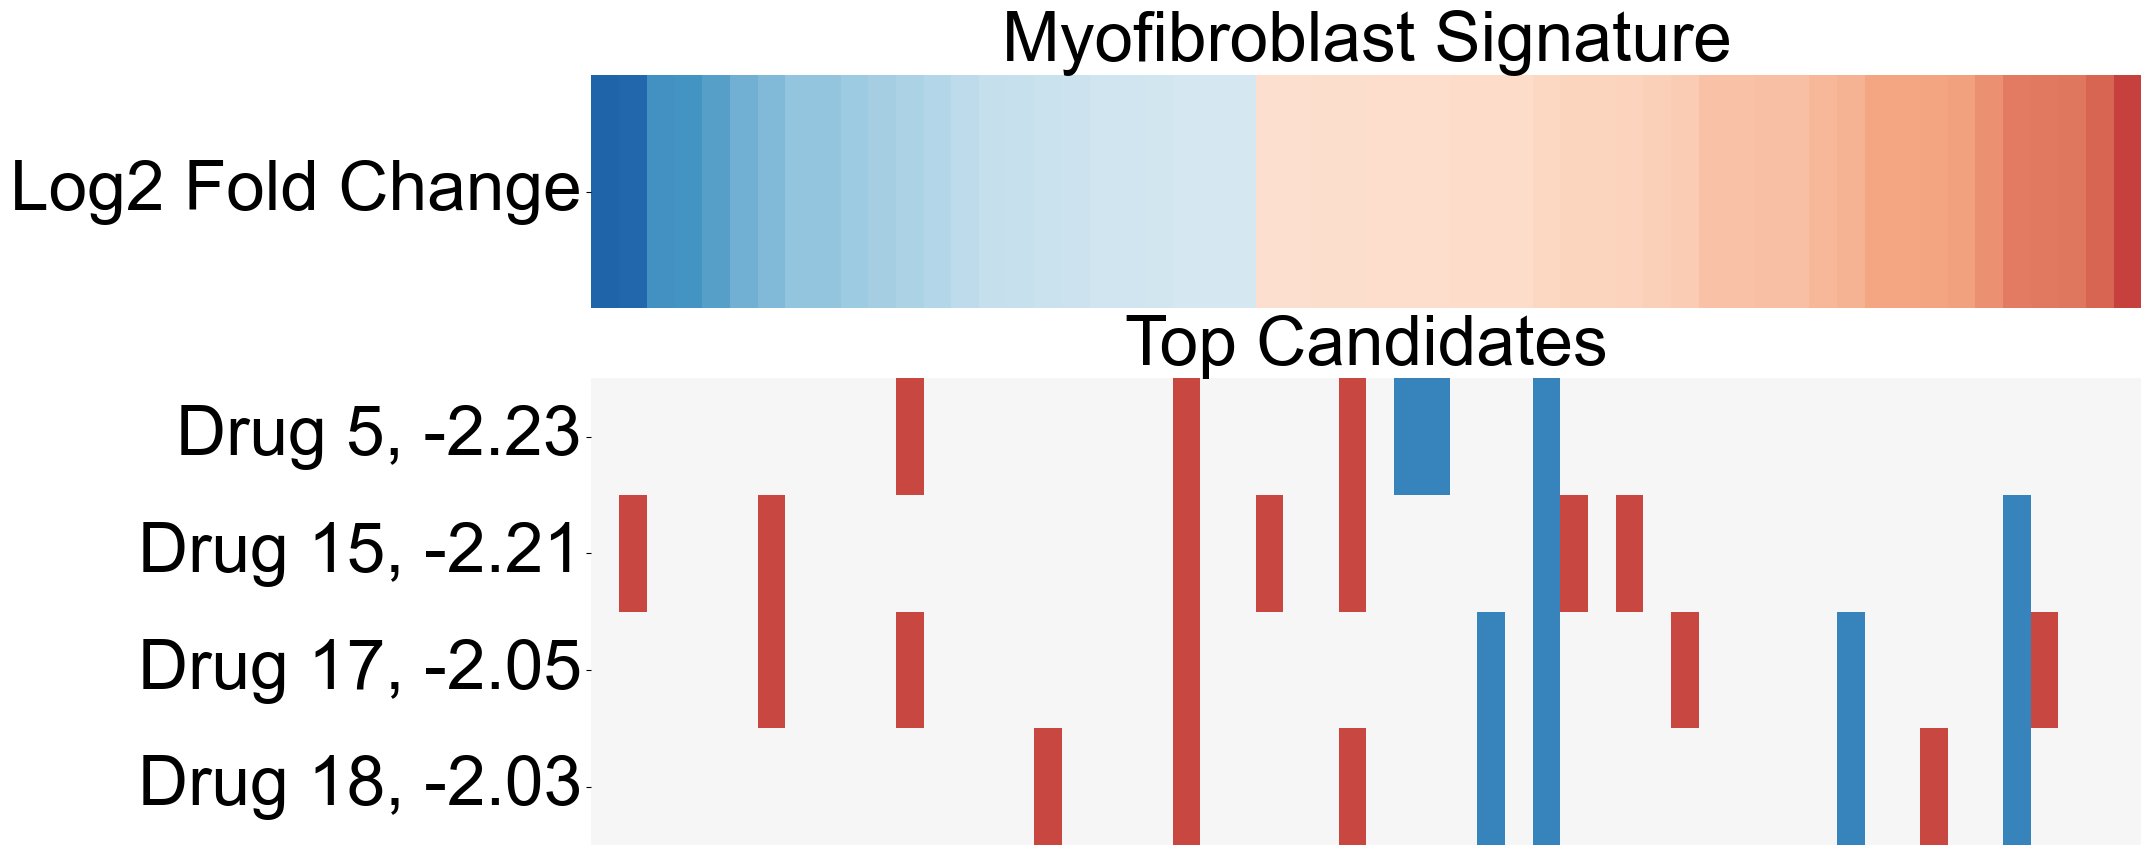

In [ ]:
metasig = pd.read_csv('./data_for_code/IPF/DZSIG__Myofibroblasts.csv', index_col=0)
sele_rges = pd.read_csv('./data_for_code/IPF/Myofibroblasts_RGES_norm.csv', index_col=0)

metasig = metasig[metasig.index.isin(sigi.index)]
metasig = metasig.sort_values(by='Value')
if len(metasig.Value) > 1000:
    metasig = metasig[np.abs(metasig.Value) > 1]
sig_drugs = sigi.reindex(metasig.index)

sig_drugs.columns = [num_drug[s] + ', ' + str(sele_rges.loc[s]['Z_RGES'])[:5] for s in sig_drugs.columns]

FIG, axes = plt.subplots(2, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [1, 2]}, constrained_layout=False)
sns.heatmap(metasig[['Value']].T, center=0, vmin=-1.5, vmax=1.5, cmap='RdBu_r', \
            xticklabels=False, cbar=False, ax=axes[0])
sns.heatmap(sig_drugs.T, center=0, vmin=-1.5, vmax=1.5, cmap='RdBu_r', cbar=False, \
            xticklabels=False, ax=axes[1])
plt.yticks(rotation=0)

axes[0].set_title(f'Myofibroblast Signature', fontsize=50)
axes[0].set_xlabel(None)
axes[0].set_yticklabels(['Log2 Fold Change'], rotation=0, fontsize=50)

axes[1].set_title('Top Candidates', fontsize=50)
axes[1].set_xlabel(None)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=50)

FIG.savefig('./data_for_code/IPF/Myofibroblasts.svg', transparent=True)

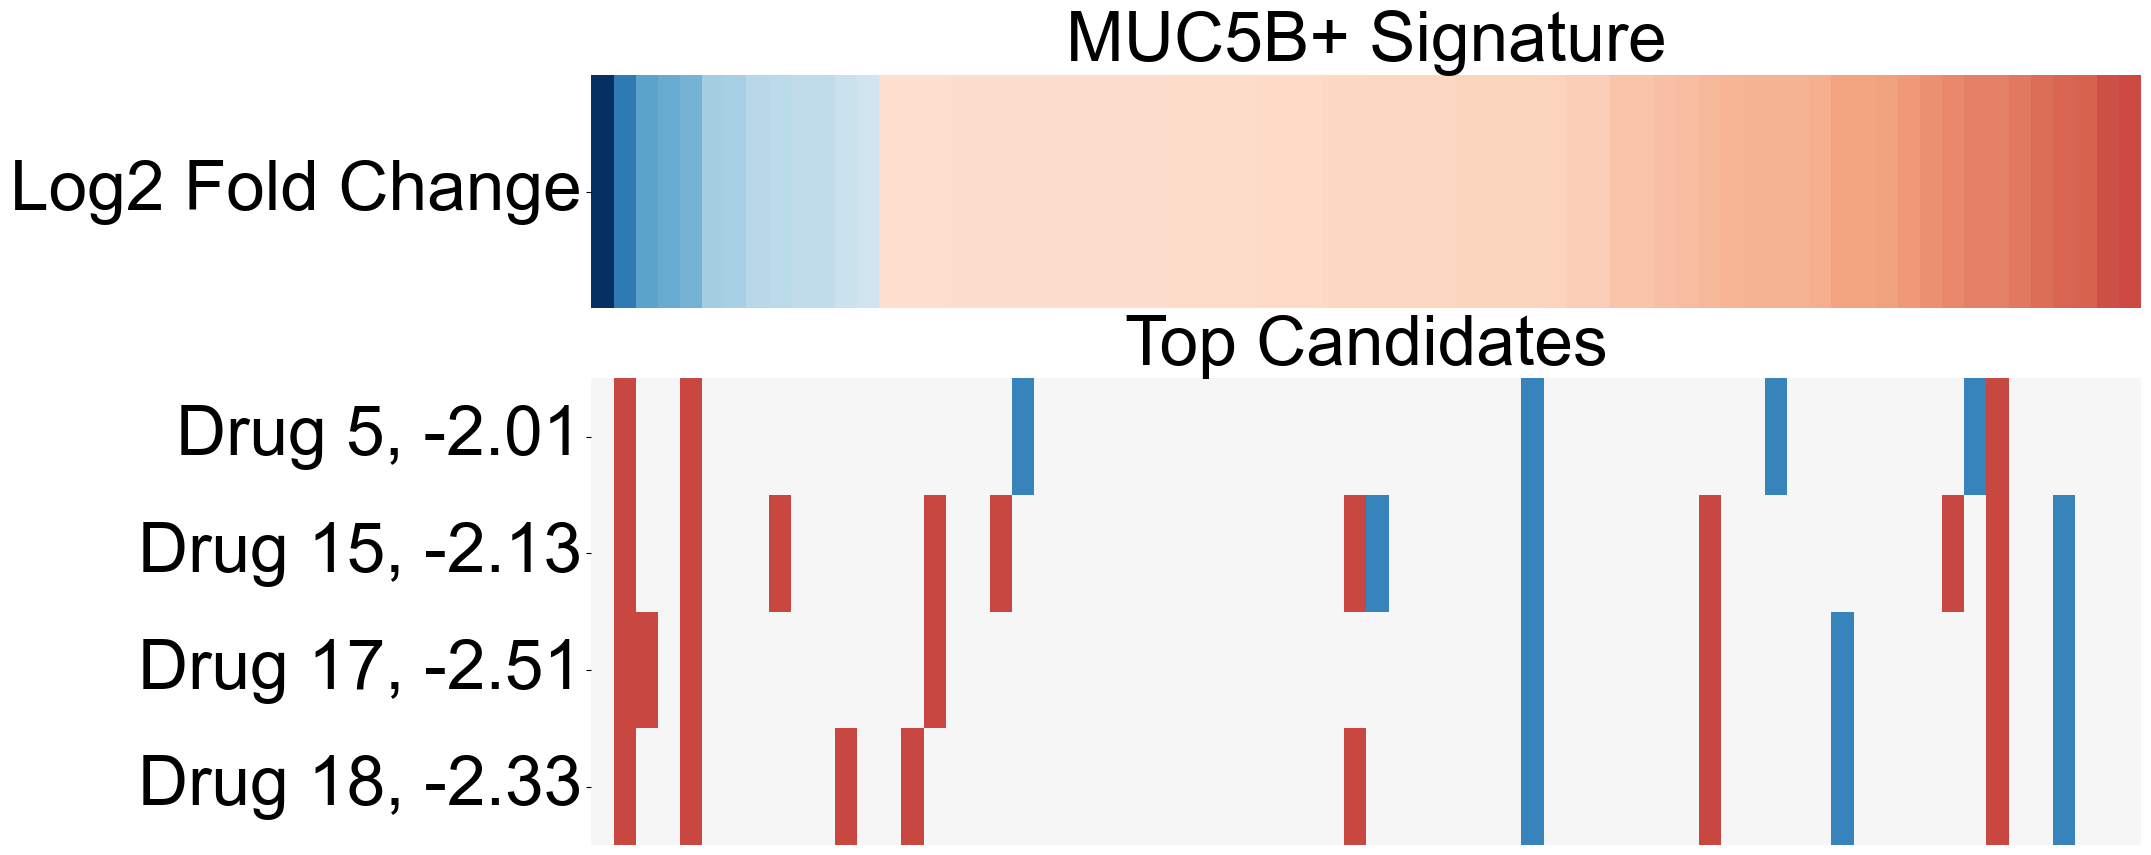

In [ ]:
metasig = pd.read_csv('./data_for_code/DZSIG__MUC5B+.csv', index_col=0)
sele_rges = pd.read_csv('./data_for_code/MUC5B+_RGES_norm.csv', index_col=0)

metasig = metasig[metasig.index.isin(sigi.index)]
metasig = metasig.sort_values(by='Value')
if len(metasig.Value) > 1000:
    metasig = metasig[np.abs(metasig.Value) > 1]
sig_drugs = sigi.reindex(metasig.index)

sig_drugs.columns = [num_drug[s] + ', ' + str(sele_rges.loc[s]['Z_RGES'])[:5] for s in sig_drugs.columns]

FIG, axes = plt.subplots(2, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [1, 2]}, constrained_layout=False)
sns.heatmap(metasig[['Value']].T, center=0, vmin=-1.5, vmax=1.5, cmap='RdBu_r', \
            xticklabels=False, cbar=False, ax=axes[0])
sns.heatmap(sig_drugs.T, center=0, vmin=-1.5, vmax=1.5, cmap='RdBu_r', cbar=False, \
            xticklabels=False, ax=axes[1])
plt.yticks(rotation=0)

axes[0].set_title('MUC5B+ Signature', fontsize=50)
axes[0].set_xlabel(None)
axes[0].set_yticklabels(['Log2 Fold Change'], rotation=0, fontsize=50)

axes[1].set_title('Top Candidates', fontsize=50)
axes[1].set_xlabel(None)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=50)

FIG.savefig('./data_for_code/MUC5B.svg', transparent=True)